In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Doing below setting to ensure that we do not see truncated data

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

## Importing Dataset

In [4]:
mobileusebasedata_df = pd.read_csv("mobileusebasedata.csv")

In [ ]:
mobileusebasedata_df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanPreview,VerifyDateOfBirth,VerifyPhone,VerifyToken,ProfileVerifySSN,Loan2,Settings,ForgotPassword,Login",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finances,Credit3,ReferralContainer,Leaderboard,Rewards,RewardDetail,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit2",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,ScanPreview,VerifyPhone,VerifySSN,Credit1,Loan2,Home,Institutions,SelectInstitution,BankVerification,ReferralContainer,product_review,product_review2,VerifyCountry,VerifyToken,product_review",32,0,0,1,2013-02-26 18:56:37.841,1


In [ ]:
mobileusebasedata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112479 entries, 0 to 112478
Columns: 121 entries, age to enrolled
dtypes: int64(121)
memory usage: 103.8 MB


In [ ]:
mobileusebasedata_df.nunique()

,0
user,49874
first_open,49747
dayofweek,7
hour,24
age,78
screen_list,38799
numscreens,151
minigame,2
used_premium_feature,2
enrolled,2


## Removing Duplicates

In [ ]:
mobileusebasedata_df[mobileusebasedata_df.duplicated(subset='user',keep=False)].sort_values(by='user')

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
20029,2477,2013-04-15 17:45:44.684,0,17:00:00,29,"Loan2,Loan",3,0,1,0,NaN,0
27838,2477,2013-04-15 17:45:44.684,0,17:00:00,27,"Loan2,Loan",3,0,1,0,NaN,0
28760,3793,2013-01-27 15:48:16.437,6,15:00:00,36,"idscreen,joinscreen,Cycle,Credit3Container,ScanPreview,VerifyMobile,VerifySSN,location,VerifyDateOfBirth,Credit1,Credit3Dashboard,Credit2,Institutions,Loan2,CommunityAndInvites,Home,SelectInstitution,BankVerification,MLWebView,product_review",47,0,0,1,2013-01-27 15:50:22.950,0
31420,3793,2013-01-27 15:48:16.437,6,15:00:00,36,"idscreen,joinscreen,Cycle,Credit3Container,ScanPreview,VerifyMobile,VerifySSN,location,VerifyDateOfBirth,Credit1,Credit3Dashboard,Credit2,Institutions,Loan2,CommunityAndInvites,Home,SelectInstitution,BankVerification,MLWebView,product_review",47,0,0,1,2013-01-27 15:50:22.950,0
49397,5867,2013-02-11 08:46:43.530,0,08:00:00,26,"Cycle,Home,Institutions,SelectInstitution,BankVerification,GroupedInstitutions,Loan2",18,0,0,0,NaN,1
49052,5867,2013-02-11 08:46:43.530,0,08:00:00,27,"Cycle,Home,Institutions,SelectInstitution,BankVerification,GroupedInstitutions,Loan2",18,0,0,0,NaN,1
49509,8767,2013-05-14 23:24:19.949,1,23:00:00,36,"Splash,idscreen,Cycle,product_review,product_review,product_review,product_review3,Home,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit3Dashboard,Credit2",22,0,0,1,2013-05-14 23:25:45.033,0
43600,8767,2013-05-14 23:24:19.949,1,23:00:00,34,"Splash,idscreen,Cycle,product_review,product_review,product_review,product_review3,Home,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit3Dashboard,Credit2",22,0,0,1,2013-05-14 23:25:45.033,0
29136,9472,2013-03-19 02:00:03.641,1,02:00:00,47,"joinscreen,Cycle,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,VerifySSN",13,0,0,1,2013-03-19 02:01:59.045,0
12650,9472,2013-03-19 02:00:03.641,1,02:00:00,41,"joinscreen,Cycle,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,VerifySSN",13,0,0,1,2013-03-19 02:01:59.045,0


From above we can observe that reason for duplication is different value for age column , hence we can conclude that presence of duplicate entry is not providing us any information and must have happened becaue of issue during data collection

In [ ]:

print("original shape of mobileusebasedata -> ",mobileusebasedata_df.shape)
print("duplicates in mobileusebasedata -> ",mobileusebasedata_df[mobileusebasedata_df.duplicated(subset='user')].shape)

##126 rows have duplicate users so dropping them -> nearly 0.002% data [126 out of 50000 records]

#Dropping duplicates:
mobileusebasedata_df = mobileusebasedata_df.drop_duplicates(subset=['user'])
print("unique rows in mobileusebasedata -> ",mobileusebasedata_df.shape)

original shape of mobileusebasedata ->  (50000, 12)
duplicates in mobileusebasedata ->  (126, 12)
unique rows in mobileusebasedata ->  (49874, 12)


In [ ]:
mobileusebasedata_df.info()
#enrolled date has null values but that is to expected because the enrolled column is 0 meaning the user has not enrolled.

<class 'pandas.core.frame.DataFrame'>
Index: 49874 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  49874 non-null  int64 
 1   first_open            49874 non-null  object
 2   dayofweek             49874 non-null  int64 
 3   hour                  49874 non-null  object
 4   age                   49874 non-null  int64 
 5   screen_list           49874 non-null  object
 6   numscreens            49874 non-null  int64 
 7   minigame              49874 non-null  int64 
 8   used_premium_feature  49874 non-null  int64 
 9   enrolled              49874 non-null  int64 
 10  enrolled_date         31004 non-null  object
 11  liked                 49874 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.9+ MB


In [ ]:
mobileusebasedata_df.describe()
# age, numscreens has  outliers

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000
mean,186896.726812,3.029334,31.713157,21.098849,0.107752,0.171853,0.621647,0.165076
std,107769.419474,2.032075,10.803037,15.726940,0.310069,0.377256,0.484981,0.371253
min,13.000000,0.000000,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93510.250000,1.000000,24.000000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.000000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279982.500000,5.000000,37.000000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.000000,325.000000,1.000000,1.000000,1.000000,1.000000


From large difference between the Median and max value for Age and numscreens we can conclude that our dataset could have outlier for Age and numscreens column.

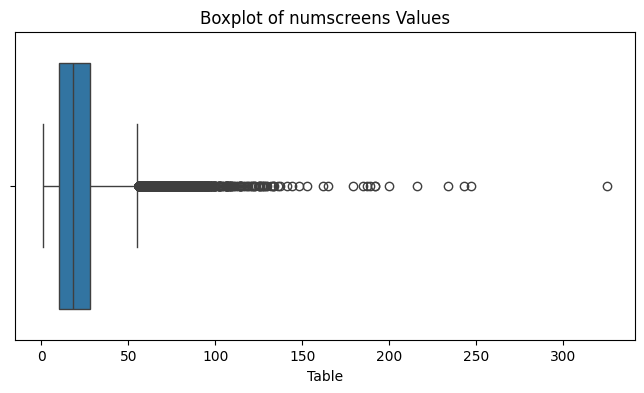

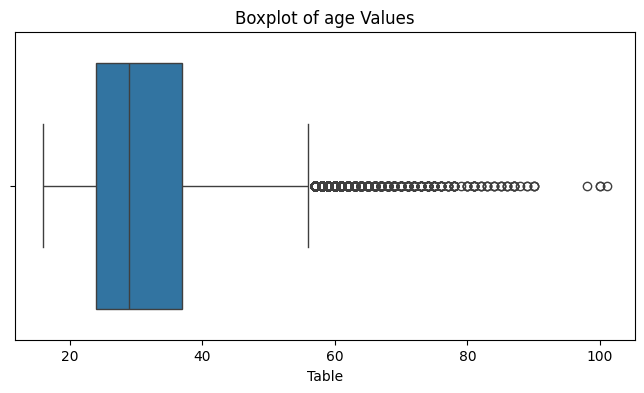

In [ ]:
# Boxplot for outlier detection in numscreens
plt.figure(figsize=(8, 4))
sns.boxplot(x=mobileusebasedata_df['numscreens'])
plt.title('Boxplot of numscreens Values')
plt.xlabel('Table')
plt.show()

# Boxplot for outlier detection in age
plt.figure(figsize=(8, 4))
sns.boxplot(x=mobileusebasedata_df['age'])
plt.title('Boxplot of age Values')
plt.xlabel('Table')
plt.show()

                                              -x-

## Data Understanding

### Phase 1

In [ ]:
mobileusebasedata = mobileusebasedata_df.copy()

#### Changing datatype

In [ ]:
#Converting hour to int to create it as feature
mobileusebasedata['hour'] = pd.to_datetime(mobileusebasedata['hour'].str.strip(), format='%H:%M:%S')
mobileusebasedata["hour"] = mobileusebasedata["hour"].dt.hour.astype(int)
mobileusebasedata.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanPreview,VerifyDateOfBirth,VerifyPhone,VerifyToken,ProfileVerifySSN,Loan2,Settings,ForgotPassword,Login",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finances,Credit3,ReferralContainer,Leaderboard,Rewards,RewardDetail,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit2",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,ScanPreview,VerifyPhone,VerifySSN,Credit1,Loan2,Home,Institutions,SelectInstitution,BankVerification,ReferralContainer,product_review,product_review2,VerifyCountry,VerifyToken,product_review",32,0,0,1,2013-02-26 18:56:37.841,1


#### Null values check

In [ ]:
null_counts = mobileusebasedata.isnull().mean()*100
sorted_null_counts = null_counts.sort_values(ascending=False)
sorted_null_counts

,0
enrolled_date,37.835345
user,0.000000
dayofweek,0.000000
first_open,0.000000
hour,0.000000
age,0.000000
numscreens,0.000000
screen_list,0.000000
minigame,0.000000
used_premium_feature,0.000000


Enrolled date seems to be mostly nulls so removing it from further analysis (**~38% null values**)

In [ ]:

mobileusebasedata.drop(columns='enrolled_date', inplace = True)

#### Date Check - col first_open

In [ ]:
mobileusebasedata.nunique()

,0
user,49874
first_open,49747
dayofweek,7
hour,24
age,78
screen_list,38799
numscreens,151
minigame,2
used_premium_feature,2
enrolled,2


In [ ]:
mobileusebasedata['first_open'].nunique()

49747

In [ ]:
mobileusebasedata['first_open'].min(), mobileusebasedata['first_open'].max()

('2012-11-23 00:10:19.912', '2013-07-09 15:52:39.983')

We do not have complete years data

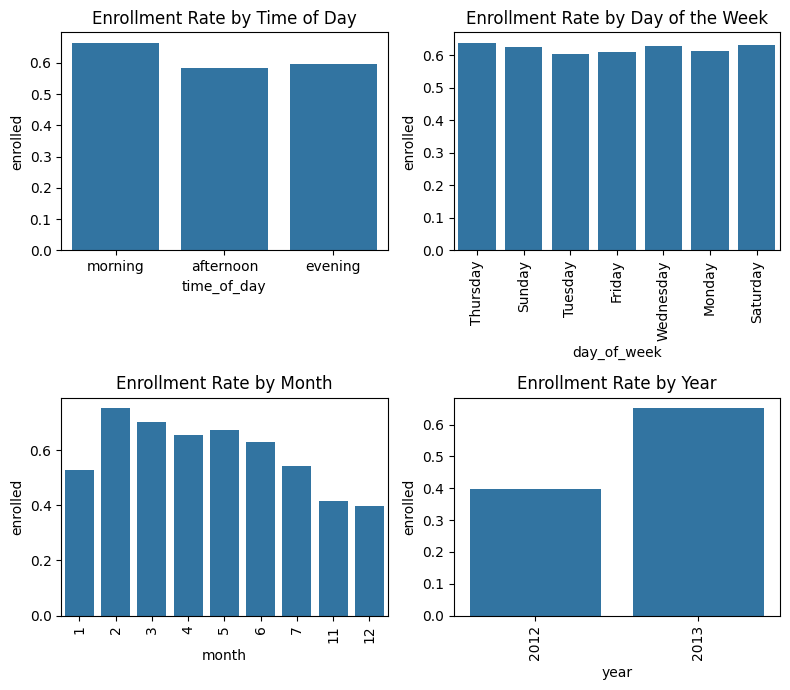

In [ ]:
mobileusebasedata['first_open'] = pd.to_datetime(mobileusebasedata['first_open'])

mobileusebasedata['day_of_week'] = mobileusebasedata['first_open'].dt.day_name()
mobileusebasedata['month'] = mobileusebasedata['first_open'].dt.month
mobileusebasedata['year'] = mobileusebasedata['first_open'].dt.year

bins = [0, 12, 17, 24]
labels = ['morning', 'afternoon', 'evening']
mobileusebasedata['time_of_day'] = pd.cut(mobileusebasedata['hour'], bins=bins, labels=labels, include_lowest=True)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 7))

# time of day
sns.barplot(x='time_of_day', y='enrolled', data=mobileusebasedata, ci=None, ax=axes[0, 0])
axes[0, 0].set_title('Enrollment Rate by Time of Day')

# day of the week
sns.barplot(x='day_of_week', y='enrolled', data=mobileusebasedata, ci=None, ax=axes[0, 1])
axes[0, 1].set_title('Enrollment Rate by Day of the Week')
axes[0, 1].tick_params(axis='x', rotation=90)

# month
sns.barplot(x='month', y='enrolled', data=mobileusebasedata, ci=None, ax=axes[1, 0])
axes[1, 0].set_title('Enrollment Rate by Month')
axes[1, 0].tick_params(axis='x', rotation=90)

# year
sns.barplot(x='year', y='enrolled', data=mobileusebasedata, ci=None, ax=axes[1, 1])
axes[1, 1].set_title('Enrollment Rate by Year')
axes[1, 1].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()


#### each col distribution understanding





1.   Since the unique users is 49874 and unique first_open is 49747 , utilizing this column directly as a feature might not be particularly informative.
2.  Even after attempting to bin the values to discern patterns, no distinct relationships with the target variable "enrolled" were observed.

Hence dropping the first_open and featured derived using this columns



In [ ]:
mobileusebasedata.drop(columns=['first_open', 'month', 'year', 'day_of_week', 'time_of_day'], inplace = True)

In [ ]:
mobileusebasedata.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanPreview,VerifyDateOfBirth,VerifyPhone,VerifyToken,ProfileVerifySSN,Loan2,Settings,ForgotPassword,Login",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finances,Credit3,ReferralContainer,Leaderboard,Rewards,RewardDetail,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit2",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,ScanPreview,VerifyPhone,VerifySSN,Credit1,Loan2,Home,Institutions,SelectInstitution,BankVerification,ReferralContainer,product_review,product_review2,VerifyCountry,VerifyToken,product_review",32,0,0,1,1


In [ ]:
mobileusebasedata["enrolled"].value_counts(normalize=True)

,proportion
enrolled,
1,0.621647
0,0.378353


We have an imbalanced dataset

#### Distribution of data using Histogram

In [ ]:
mobileusebasedata.columns

Index(['user', 'dayofweek', 'hour', 'age', 'screen_list', 'numscreens',
       'minigame', 'used_premium_feature', 'enrolled', 'liked'],
      dtype='object')

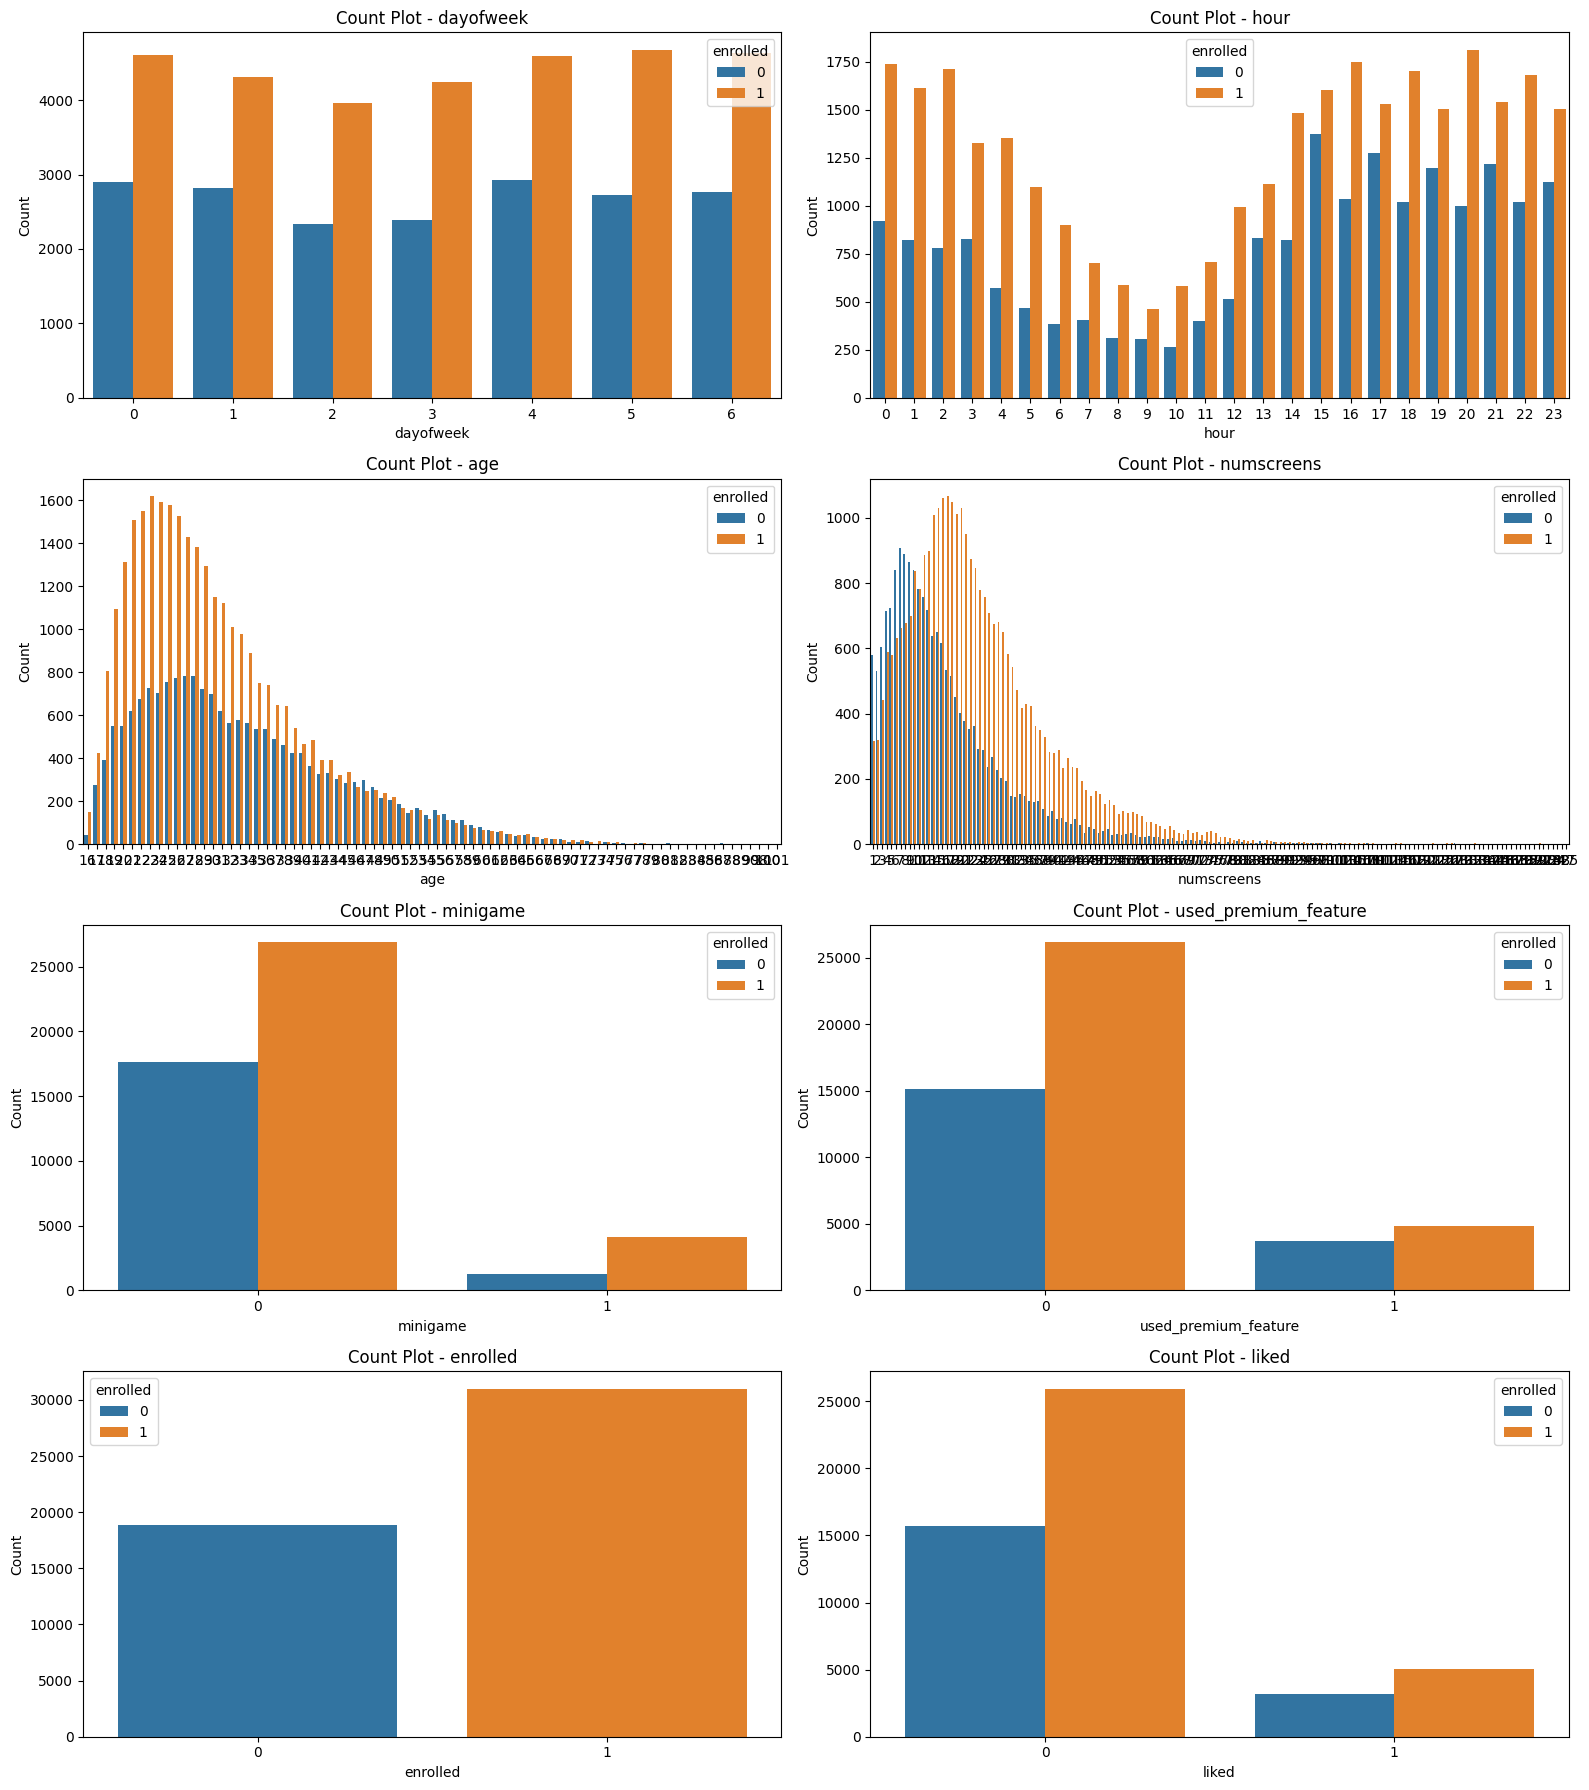

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 18))
axes = axes.flatten()
columns_to_plot = ['dayofweek', 'hour', 'age', 'numscreens', 'minigame',
                   'used_premium_feature', 'enrolled', 'liked']

for i, column in enumerate(columns_to_plot):
    sns.countplot(data=mobileusebasedata, x=column, ax=axes[i], hue='enrolled')
    axes[i].set_title(f'Count Plot - {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


Inference: age,numscreen -> right skewed
    
Day of Week Distribution:
The distribution of user activity across days of the week varies,
with a peak on day 4 (possibly Thursday) and relatively lower activity on days 2 and 3 (Tuesday and Wednesday).

Hourly Distribution:
User activity is highest during the 15th to 20th hours of the day,
suggesting peak usage during late afternoon and early evening.

Activity decreases during the early morning hours (0-9) and gradually increases from morning to late afternoon.

Age Distribution:
The age distribution is right-skewed, with the majority of users in their early to mid-20s.

Numscreens Distribution:
The distribution of the number of screens viewed by users is right-skewed, with a few users having a
significantly higher number of screens.

Minigame and Used Premium Feature Distribution:
The majority of users did not play the minigame (0), while a smaller percentage engaged in the minigame (1).
A larger proportion of users did not use the premium feature (0), while a smaller percentage used the premium
feature (1).

Liked Distribution:
The distribution of the 'liked' feature suggests that a significant number of users did not indicate liking (0),
while a smaller percentage did indicate liking (1).

#### Above columns correlation with target variable : Since features with high correlation might have more predictive power.

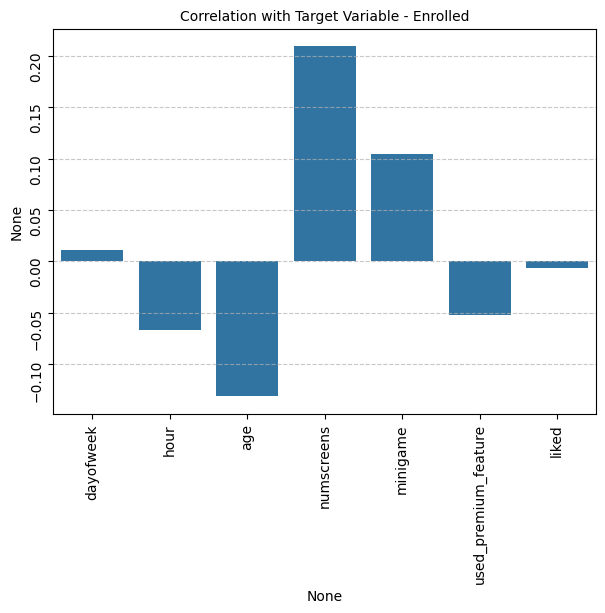

In [ ]:
# Above columns correlation with target variable
columns_to_plot = ['dayofweek', 'hour', 'age', 'numscreens', 'minigame',
                   'used_premium_feature', 'liked']
plt.figure(figsize=(7, 5))
plt.title('Correlation with Target Variable - Enrolled', fontsize=10)
correlation_data = mobileusebasedata[columns_to_plot]
correlation_values = correlation_data.corrwith(mobileusebasedata['enrolled'])

ax = sns.barplot(x=correlation_values.index, y=correlation_values)
ax.tick_params(labelsize=10, labelrotation=90, color='k')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

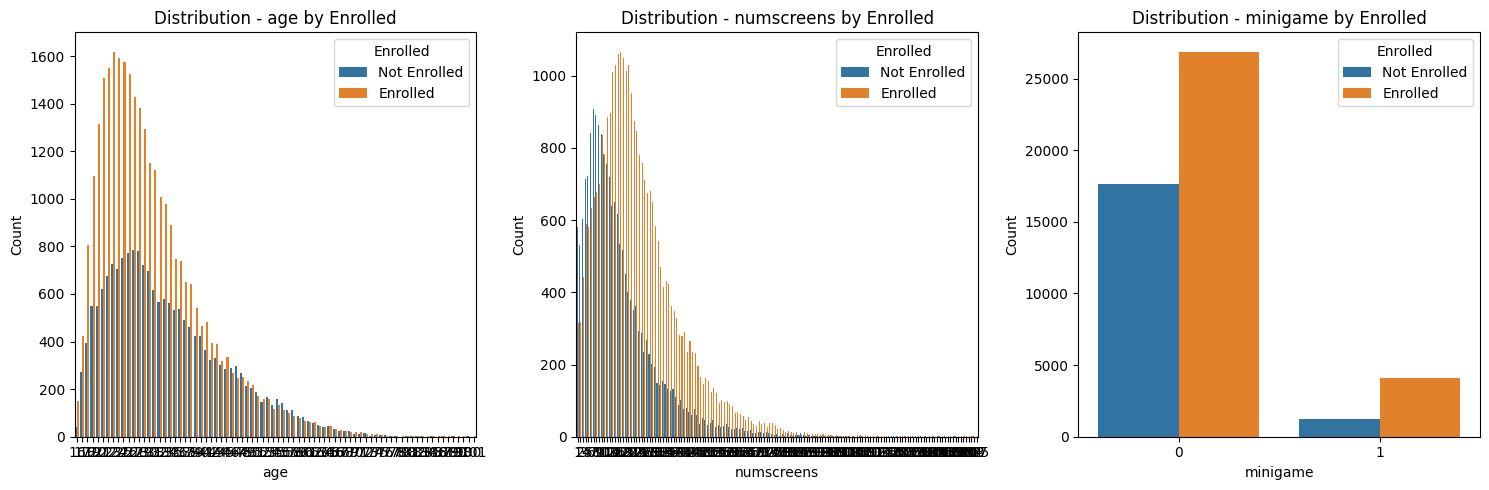

In [ ]:
# Seeing distribution of columns that are highly correlated with target variable
cols =['enrolled', 'age', 'numscreens', 'minigame']
plt.figure(figsize=(15, 5))

for i, column in enumerate(cols[1:]):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=column, hue='enrolled', data=mobileusebasedata)
    plt.title(f'Distribution - {column} by Enrolled')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Enrolled', labels=['Not Enrolled', 'Enrolled'])

plt.tight_layout()
plt.show()

#

Minigame does not seem to have any distinctive trait

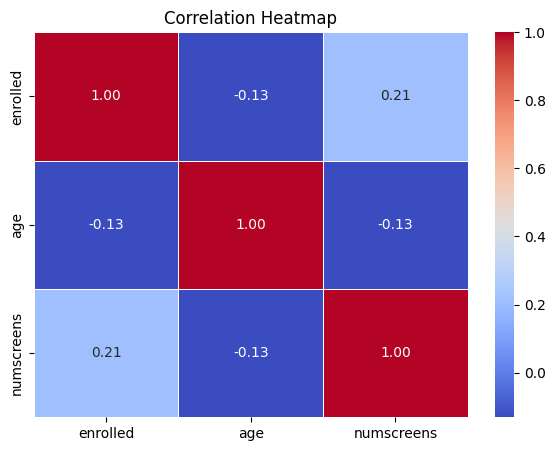

In [ ]:
# Checking the correlation between age and numscreens:
cols =['enrolled', 'age', 'numscreens']
correlation_matrix = mobileusebasedata[cols].corr()
# print(correlation_matrix)

plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


                                    -x-

In [ ]:
all_cols_set1 = ['user','enrolled', 'age', 'numscreens', 'screen_list']

In [ ]:
mobileusebasedata_2 = mobileusebasedata[all_cols_set1]
mobileusebasedata_2.head(1)

,user,enrolled,age,numscreens,screen_list
0,235136,0,23,15,"idscreen,joinscreen,Cycle,product_review,ScanPreview,VerifyDateOfBirth,VerifyPhone,VerifyToken,ProfileVerifySSN,Loan2,Settings,ForgotPassword,Login"


In [ ]:
mobileusebasedata_3 = mobileusebasedata_2.copy(deep=True)

In [ ]:
import re
def process_column_value(value):

    return re.sub(r'\d+', '', value.lower())

mobileusebasedata_3['screen_list']=mobileusebasedata_3['screen_list'].apply(process_column_value)

In [ ]:
def explode_columns_screen_list(df):
    df['screen_list_cleaned'] = df['screen_list'].str.lower().str.split(',')
    df = df.explode('screen_list_cleaned', ignore_index=True)
    df['count'] = 1
    pivot_df = pd.pivot_table(df, index='user', columns=['screen_list_cleaned'], values='count', aggfunc='sum', fill_value=0)
    pivot_df = pivot_df.reset_index().fillna('')
    print(pivot_df.shape)
    return pivot_df


mobileusebasedata_3 = explode_columns_screen_list(mobileusebasedata_3)

(49874, 119)


In [ ]:
merged_df = mobileusebasedata_2.merge(mobileusebasedata_3,on='user',how='inner')

Dropping below columns from the merged dataframe :

user : Because this column is not useful for our analysis as user_id does not determine whether a person will enroll or not
screen_list : Because we have seperated the information present in this column into multiple columns


In [ ]:
merged_df.drop(columns=['user','screen_list'],axis=1,inplace=True)

In [ ]:
len(merged_df.columns)

121

In [ ]:
final_df = pd.read_csv("final_dataset.csv")

In [ ]:
final_df.info()

(73120, 121)

In [ ]:
final_df['age_log'] = final_df['age'].apply(np.log)

In [ ]:
final_df['numscreens_log'] = final_df['numscreens'].apply(np.log)

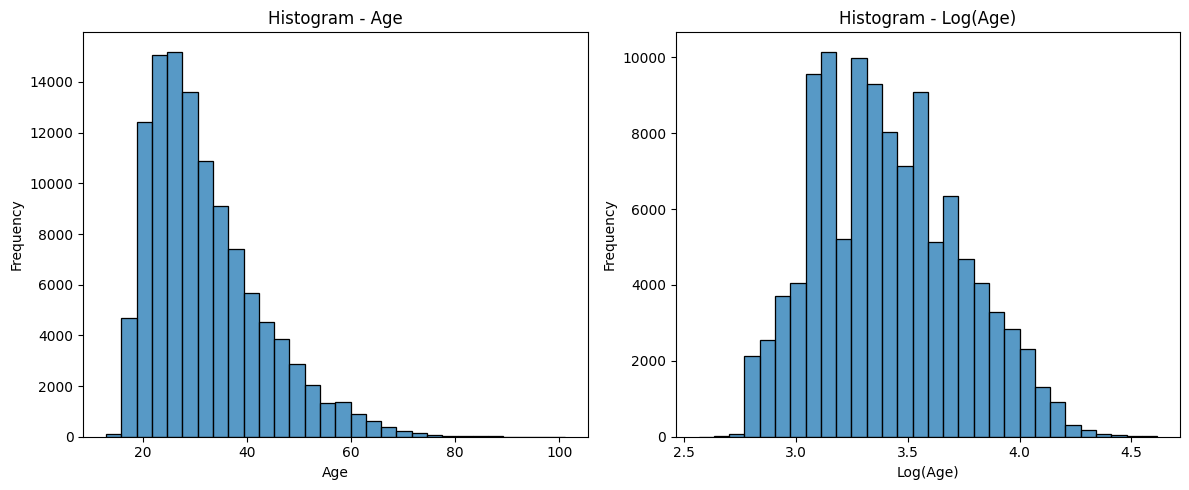

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram for 'age'
sns.histplot(x='age', data=final_df, bins=30, kde=False, ax=axes[0])
axes[0].set_title('Histogram - Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Plot histogram for 'age_log'
sns.histplot(x='age_log', data=final_df, bins=30, kde=False, ax=axes[1])
axes[1].set_title('Histogram - Log(Age)')
axes[1].set_xlabel('Log(Age)')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

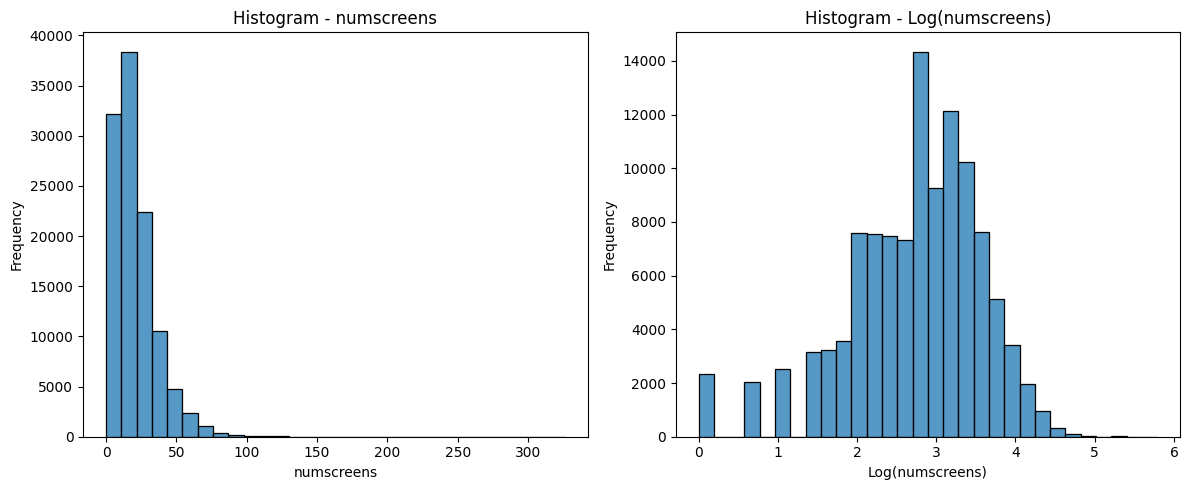

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram for 'numscreen'
sns.histplot(x='numscreens', data=final_df, bins=30, kde=False, ax=axes[0])
axes[0].set_title('Histogram - numscreens')
axes[0].set_xlabel('numscreens')
axes[0].set_ylabel('Frequency')

# Plot histogram for 'numscreens_log'
sns.histplot(x='numscreens_log', data=final_df, bins=30, kde=False, ax=axes[1])
axes[1].set_title('Histogram - Log(numscreens)')
axes[1].set_xlabel('Log(numscreens)')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Keeping columns that have clear distinct feature between those who enrolled (1) and those who did not (0)


In [ ]:
all_cols_set1 = ['user','enrolled', 'age_log', 'numscreens_log']

In [ ]:
final_df.describe()

,age,numscreens,about,accountview,addproperty,addvehicle,adverseactions,alerts,bankverification,boostfriendslist,bvplaidlinkcontainer,bvstats,camerascreen,cc,cccategory,communityandinvites,contactinfoconfirm,credit,creditalerts,creditcontainer,creditcta,creditdashboard,credits,cycle,editprofile,employmentinfo,employmentsummary,finances,findfriendscycle,forgotpassword,groupedinstitutions,history,home,idandselfiecamerascreen,identityverification,idscreen,instantloanssn,instantoffercreateaccount,institutions,joinscreen,landingscreen,leaderboard,listpicker,llloanamount,loan,loanappagreement,loanappbankinfo,loanappconfirmwithdrawal,loanappdenied,loanappesign,loanapploan,loanapppaymentschedule,loanapppromocode,loanappreasons,loanapprequestamount,loanappschedulecall,loanappsuccess,loanappverifybankinfo,loanappwithdrawn,location,login,loginform,managefinances,mlwebview,networkfailure,networkuser,newcontactlistinvite,payoff,product_review,profileannualincome,profilechildren,profilecompanyname,profileeducation,profileeducationmajor,profileemploymentlength,profilejobtitle,profilemaritalstatus,profilepage,profileproduct_review,profileverifyincometype,profileverifyssn,providerlist,referralcontainer,referrals,referralscreen,resendtoken,reviewcreditcard,rewarddetail,rewardjoinscreen,rewards,rewardscontainer,saving,savingamount,savinggoaledit,savinggoalincomesalary,savinggoalother,savinggoalpreview,scanpreview,securitymodal,selectinstitution,settings,signup,signupemail,signupname,splash,transactionlist,verifyannualincome,verifybankinfo,verifycountry,verifydateofbirth,verifyhousing,verifyhousingamount,verifyincometype,verifymobile,verifyphone,verifyssn,verifytoken,webview,welcomebankverification,yournetwork,enrolled,age_log,numscreens_log
count,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.00000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.00000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,112479.000000,1.124790e+05
mean,31.903760,20.488260,0.008873,0.022022,0.000071,0.000249,0.000187,0.060767,0.284933,0.000916,0.007779,0.000391,0.001645,0.102001,0.051450,0.070964,0.001138,0.353559,0.006499,0.303666,0.000009,0.170530,0.000649,0.317757,0.041919,0.000116,0.000400,0.067159,0.012740,0.002996,0.030219,0.029579,0.750896,0.000018,0.000027,0.301727,0.000027,0.000969,0.271233,0.241387,0.004561,0.043057,0.005930,0.004107,0.758035,0.000471,0.00056,0.000133,0.002294,0.002623,0.000018,0.005921,0.001040,0.001280,0.001529,0.002089,0.002143,0.00

As for most of the numberical columns max value is less than 100 we can reduse the merged_df size by changing its datatype

In [ ]:
int8_col=[]
int16_col=[]
int32_col=[]
int64_col=[]

for col in final_df.columns:

  if final_df[col].dtype not in ('datetime64[ns]','object') :

    if final_df[col].between(-128, 127).all():
      int8_col.append(col)

    elif final_df[col].between(-32768, 32767).all():
      int16_col.append(col)

    elif final_df[col].between(-2147483648, 2147483647).all():
      int32_col.append(col)

    else:
      int64_col.append(col)



for col in int8_col:
  final_df[col]=final_df[col].astype(np.int8)

for col in int16_col:
  final_df[col]=final_df[col].astype(np.int16)

for col in int32_col:
  final_df[col]=final_df[col].astype(np.int32)

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112479 entries, 0 to 112478
Columns: 123 entries, age to numscreens_log
dtypes: float64(1), int16(1), int8(121)
memory usage: 14.1 MB


#Feature Engineering

In [ ]:
engineered_df=final_df.copy(deep=True)

In [ ]:
import plotly.express as px

corr = engineered_df.corr()

corr_enrolled = corr.loc[['enrolled']]

fig = px.imshow(corr_enrolled,
                color_continuous_scale='blues',
                labels=dict(color='Correlation'),
                x=corr_enrolled.columns,
                y=['enrolled'],
                title='Correlation Heatmap with Enrolled')

fig.update_layout(coloraxis_colorbar=dict(title='Correlation'),
                  xaxis=dict(title='Features'))

fig.update_layout(width=1200, height=500)

fig.show()

In [ ]:
corr_enrolled

,age,numscreens,about,accountview,addproperty,addvehicle,adverseactions,alerts,bankverification,boostfriendslist,bvplaidlinkcontainer,bvstats,camerascreen,cc,cccategory,communityandinvites,contactinfoconfirm,credit,creditalerts,creditcontainer,creditcta,creditdashboard,credits,cycle,editprofile,employmentinfo,employmentsummary,finances,findfriendscycle,forgotpassword,groupedinstitutions,history,home,idandselfiecamerascreen,identityverification,idscreen,instantloanssn,instantoffercreateaccount,institutions,joinscreen,landingscreen,leaderboard,listpicker,llloanamount,loan,loanappagreement,loanappbankinfo,loanappconfirmwithdrawal,loanappdenied,loanappesign,loanapploan,loanapppaymentschedule,loanapppromocode,loanappreasons,loanapprequestamount,loanappschedulecall,loanappsuccess,loanappverifybankinfo,loanappwithdrawn,location,login,loginform,managefinances,mlwebview,networkfailure,networkuser,newcontactlistinvite,payoff,product_review,profileannualincome,profilechildren,profilecompanyname,profileeducation,profileeducationmajor,profileemploymentlength,profilejobtitle,profilemaritalstatus,profilepage,profileproduct_review,profileverifyincometype,profileverifyssn,providerlist,referralcontainer,referrals,referralscreen,resendtoken,reviewcreditcard,rewarddetail,rewardjoinscreen,rewards,rewardscontainer,saving,savingamount,savinggoaledit,savinggoalincomesalary,savinggoalother,savinggoalpreview,scanpreview,securitymodal,selectinstitution,settings,signup,signupemail,signupname,splash,transactionlist,verifyannualincome,verifybankinfo,verifycountry,verifydateofbirth,verifyhousing,verifyhousingamount,verifyincometype,verifymobile,verifyphone,verifyssn,verifytoken,webview,welcomebankverification,yournetwork,enrolled,age_log,numscreens_log
enrolled,-0.130966,0.22167,0.014296,-0.037101,0.007706,0.003101,-0.009729,-0.089459,0.263356,-0.00126,0.042903,-0.008108,0.003161,0.054445,0.05666,0.013546,0.010718,0.283924,-0.063633,0.133599,-0.003263,0.128283,0.000151,0.18157,0.038693,-0.001802,0.011137,0.047297,0.047919,0.023629,0.011112,-0.117204,0.029488,0.003853,0.001262,0.255734,-0.005652,0.003784,0.074377,0.207218,0.006734,0.03057,-0.003375,-0.026181,-0.12385,-0.006487,-0.016854,-0.006455,-0.033443,-0.028197,-0.004615,-0.00488,0.012869,0.012243,0.011542,-0.026227,-0.027161,-0.004996,-0.004996,0.276029,0.006222,-0.001368,0.013504,-0.009814,0.031366,-0.005652,0.040999,-0.01842,0.259077,0.000034,0.046191,0.051932,0.054064,0.054014,0.044862,0.048033,0.045743,0.025394,-0.004265,-0.001451,-0.068621,-0.009994,0.101211,0.015128,0.021745,0.007695,0.003122,0.051341,0.035048,0.040663,0.065585,0.05845,-0.009149,0.008653,-0.002291,0.022921,0.014976,0.420872,0.050248,0.304596,-0.000157,0.024984,0.008596,0.026007,0.009683,-0.015179,0.065605,0.011244,0.253999,0.303782,0.073107,0.070655,0.063959,0.167721,0.429806,0.712009,0.306357,-0.036436,-0.078243,-0.002492,1.0,-0.065401,0.266632


In [ ]:
high_corr_columns = corr_enrolled.columns[abs(corr_enrolled.iloc[0]) > 0.08]
high_corr_columns

Index(['age', 'numscreens', 'alerts', 'bankverification', 'credit',
       'creditcontainer', 'creditdashboard', 'cycle', 'history', 'idscreen',
       'joinscreen', 'loan', 'location', 'product_review', 'referralcontainer',
       'scanpreview', 'selectinstitution', 'verifycountry',
       'verifydateofbirth', 'verifymobile', 'verifyphone', 'verifyssn',
       'verifytoken', 'enrolled', 'numscreens_log'],
      dtype='object')

In [ ]:
imp_features_check = ['numscreens_log', 'age_log', 'alerts', 'bankverification', 'credit',
       'creditalerts', 'creditcontainer', 'cycle', 'history', 'idscreen',
       'joinscreen', 'loan', 'location', 'product_review', 'profileverifyssn',
       'scanpreview', 'selectinstitution', 'verifycountry',
       'verifydateofbirth', 'verifymobile', 'verifyphone', 'verifyssn',
       'verifytoken', 'welcomebankverification']
len(imp_features_check)

24

In [ ]:
imp_features=['age_log','numscreens_log','alerts','bankverification','credit','creditalerts','creditcontainer','creditdashboard','cycle','history','idscreen','joinscreen','loan','location','product_review',
              'profileverifyssn','scanpreview','selectinstitution','verifycountry','verifydateofbirth','verifymobile','verifyphone','verifyssn','verifytoken'
              ]
len(imp_features)

24

In [ ]:
feature_engineered_df = pd.DataFrame()
feature_engineered_df = engineered_df[['enrolled']+imp_features]
len(feature_engineered_df.columns)

25

In [ ]:
feature_engineered_df.corr()

,enrolled,age_log,numscreens_log,alerts,bankverification,credit,creditalerts,creditcontainer,creditdashboard,cycle,history,idscreen,joinscreen,loan,location,product_review,profileverifyssn,scanpreview,selectinstitution,verifycountry,verifydateofbirth,verifymobile,verifyphone,verifyssn,verifytoken
enrolled,1.000000,-0.065401,0.266632,-0.089459,0.263356,0.283924,-0.063633,0.133599,0.128283,0.181570,-0.117204,0.255734,0.207218,-0.123850,0.276029,0.259077,-0.068621,0.420872,0.304596,0.253999,0.303782,0.167721,0.429806,0.712009,0.306357
age_log,-0.065401,1.000000,-0.071349,0.040996,-0.012458,-0.016788,0.007980,-0.044435,0.023797,-0.102679,0.040455,-0.103305,-0.038436,0.007403,-0.095994,-0.059252,0.009828,-0.100385,-0.019185,-0.061077,-0.103105,-0.017192,-0.074373,-0.078699,-0.069047
numscreens_log,0.266632,-0.071349,1.000000,0.169790,0.339335,0.307512,0.054869,0.318074,0.234452,0.158507,0.064204,0.178377,0.088586,0.351356,0.430658,0.409594,0.104415,0.293524,0.391072,0.409193,0.369864,0.140943,0.465589,0.414600,0.407556
alerts,-0.089459,0.040996,0.169790,1.000000,-0.032773,0.022806,0.121145,0.160355,0.143419,-0.021410,0.151303,-0.065209,-0.077997,0.180895,-0.071376,-0.083223,-0.011272,-0.134357,-0.036475,-0.081314,-0.088858,0.024381,-0.098969,-0.083076,-0.089172
bankverification,0.263356,-0.012458,0.339335,-0.032773,1.000000,0.069736,-0.016738,0.029333,0.047955,0.109234,-0.084514,0.108175,0.120950,-0.017208,0.197769,0.323242,0.137952,0.200621,0.793897,0.352538,0.159393,0.045808,0.314977,0.339719,0.330789
credit,0.283924,-0.016788,0.307512,0.022806,0.069736,1.000000,0.053322,0.167634,0.470287,0.083798,-0.020735,0.175530,-0.042783,0.086345,0.202997,0.056945,-0.076489,0.185494,0.102843,-0.048189,0.215501,0.201246,0.265293,0.434645,-0.035238
creditalerts,-0.063633,0.007980,0.054869,0.121145,-0.016738,0.053322,1.000000,0.085181,0.142192,0.001359,0.071430,-0.028579,-0.043813,0.086131,-0.046167,-0.038143,-0.014614,-0.074283,-0.026603,-0.037068,-0.056390,-0.016764,-0.053481,-0.058461,-0.042552
creditcontainer,0.133599,-0.044435,0.318074,0.160355,0.029333,0.167634,0.085181,1.000000,0.479338,0.089888,0.084185,-0.023832,0.158096,0.235581,0.049398,-0.161786,0.008621,0.122647,0.035037,-0.093588,0.031089,0.305987,0.013504,0.157531,-0.060866
creditdashboard,0.128283,0.023797,0.234452,0.143419,0.047955,0.470287,0.142192,0.479338,1.000000,0.096520,0.088690,0.012441,0.021155,0.143334,0.063995,-0.122862,-0.063134,0.082921,0.050561,-0.107517,0.049544,0.261955,0.090181,0.262999,-0.089599
cycle,0.181570,-0.102679,0.158507,-0.021410,0.109234,0.083798,0.001359,0.089888,0.096520,1.000000,0.001107,0.361085,0.052456,0.037824,0.061796,0.072806,-0.008664,0.149916,0.098333,0.061185,0.058014,0.033514,0.120191,0.160471,0.078934


Splitting of Data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score,confusion_matrix, roc_curve, auc,classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler

In [ ]:
df = feature_engineered_df.copy(deep=True)

In [ ]:
print(feature_engineered_df.count())

enrolled             112479
age_log              112479
numscreens_log       112479
alerts               112479
bankverification     112479
credit               112479
creditalerts         112479
creditcontainer      112479
creditdashboard      112479
cycle                112479
history              112479
idscreen             112479
joinscreen           112479
loan                 112479
location             112479
product_review       112479
profileverifyssn     112479
scanpreview          112479
selectinstitution    112479
verifycountry        112479
verifydateofbirth    112479
verifymobile         112479
verifyphone          112479
verifyssn            112479
verifytoken          112479
dtype: int64


In [ ]:
target_variable = 'enrolled'
X = df.drop(target_variable, axis=1)  # Features
y = df[target_variable]

X = X.replace([np.inf, -np.inf], np.nan).fillna(0)  # Replace infinities and NaNs with 0

y = y.replace([np.inf, -np.inf], np.nan).fillna(0)  # Replace infinities and NaNs with 0



# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))

    model.append(algo)
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    F1score.append(f1_score(y_test,y_pred))
    AUCROC.append(roc_auc_score(y_test, y_prob[:,1]))
    resample.append(sampling)

#Handling class imbalance using SMOTE based techniques


A) SMOTE Technique


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({1: 48912, 0: 41071})
After Counter({1: 48912, 0: 48912})


B) ADASYN Technique

In [ ]:
from imblearn.over_sampling import ADASYN

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=130)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)

Before Counter({1: 48912, 0: 41071})
After Counter({1: 48912, 0: 44979})


C) Hybrid Techniques

C.1) SMOTE + Tomek Links

In [ ]:
from imblearn.combine import SMOTETomek

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
X_train_smtom, y_train_smtom = smtom.fit_resample(X_train, y_train)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({1: 48912, 0: 41071})
After Counter({1: 48520, 0: 48520})


C.2) SMOTE + ENN

In [ ]:
from imblearn.combine import SMOTEENN

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
X_train_smenn, y_train_smenn = smenn.fit_resample(X_train, y_train)

counter = Counter(y_train_smenn)
print('After',counter)

Before Counter({1: 48912, 0: 41071})
After Counter({1: 37143, 0: 34670})


Model Building - Imbalanced data

In [ ]:
model = list()
resample = list()
precision = list()
recall = list()
F1score = list()
AUCROC = list()

In [ ]:
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))

    model.append(algo)
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    F1score.append(f1_score(y_test,y_pred))
    AUCROC.append(roc_auc_score(y_test, y_prob[:,1]))
    resample.append(sampling)

In [ ]:
log_model=LogisticRegression()

In [ ]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
test_eval(log_model, X_test, y_test, 'Logistic Regression', 'actual')

Confusion Matrix
[[9525  582]
 [2801 9588]] 

Classification Report
              precision    recall  f1-score   support

           0       0.77      0.94      0.85     10107
           1       0.94      0.77      0.85     12389

    accuracy                           0.85     22496
   macro avg       0.86      0.86      0.85     22496
weighted avg       0.87      0.85      0.85     22496
 

AUC-ROC
0.9196529613561082


In [ ]:
test_eval(log_model.fit(X_train_sm, y_train_sm), X_test, y_test, 'Logistic Regression', 'smote')

Confusion Matrix
[[9667  440]
 [2972 9417]] 

Classification Report
              precision    recall  f1-score   support

           0       0.76      0.96      0.85     10107
           1       0.96      0.76      0.85     12389

    accuracy                           0.85     22496
   macro avg       0.86      0.86      0.85     22496
weighted avg       0.87      0.85      0.85     22496
 

AUC-ROC
0.919569736916934


In [ ]:
test_eval(log_model.fit(X_train_ada, y_train_ada), X_test, y_test, 'Logistic Regression', 'adasyn')

Confusion Matrix
[[9736  371]
 [3070 9319]] 

Classification Report
              precision    recall  f1-score   support

           0       0.76      0.96      0.85     10107
           1       0.96      0.75      0.84     12389

    accuracy                           0.85     22496
   macro avg       0.86      0.86      0.85     22496
weighted avg       0.87      0.85      0.85     22496
 

AUC-ROC
0.9196946734034939


In [ ]:
test_eval(log_model.fit(X_train_smtom, y_train_smtom), X_test, y_test, 'Logistic Regression', 'smote+tomek')


Confusion Matrix
[[9671  436]
 [2974 9415]] 

Classification Report
              precision    recall  f1-score   support

           0       0.76      0.96      0.85     10107
           1       0.96      0.76      0.85     12389

    accuracy                           0.85     22496
   macro avg       0.86      0.86      0.85     22496
weighted avg       0.87      0.85      0.85     22496
 

AUC-ROC
0.9194161139141559


In [ ]:
test_eval(log_model.fit(X_train_smenn, y_train_smenn), X_test, y_test, 'Logistic Regression', 'smote+enn')


Confusion Matrix
[[9711  396]
 [2991 9398]] 

Classification Report
              precision    recall  f1-score   support

           0       0.76      0.96      0.85     10107
           1       0.96      0.76      0.85     12389

    accuracy                           0.85     22496
   macro avg       0.86      0.86      0.85     22496
weighted avg       0.87      0.85      0.85     22496
 

AUC-ROC
0.9156625327815524


In [ ]:
clf_eval_df = pd.DataFrame({'model':model,
                            'resample':resample,
                            'precision':precision,
                            'recall':recall,
                            'f1-score':F1score,
                            'AUC-ROC':AUCROC})

In [ ]:
clf_eval_df

,model,resample,precision,recall,f1-score,AUC-ROC
0,Logistic Regression,actual,0.942773,0.773912,0.850038,0.919653
1,Logistic Regression,smote,0.955362,0.760110,0.846624,0.919570
2,Logistic Regression,adasyn,0.961713,0.752200,0.844151,0.919695
3,Logistic Regression,smote+tomek,0.955741,0.759948,0.846673,0.919416
4,Logistic Regression,smote+enn,0.959567,0.758576,0.847316,0.915663


SVM implementation

In [ ]:
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# Make predictions
y_pred = svm_model.predict(X_test)

In [ ]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.72      1.00      0.84     10107
           1       1.00      0.69      0.82     12389

    accuracy                           0.83     22496
   macro avg       0.86      0.84      0.83     22496
weighted avg       0.88      0.83      0.83     22496

Accuracy Score: 0.8289473684210527


All Models


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, roc_auc_score,auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_val_predict, StratifiedKFold

In [ ]:
def model_evaluation(y_test,y_pred):

  conf_matrix = confusion_matrix(y_test, y_pred)
  class_report = classification_report(y_test, y_pred)

  print()

  print(f'Classification Report:\n{class_report}')
  print()
  # Create a heatmap of the confusion matrix
  sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix Heatmap')
  plt.show()

LogisticRegression
Training accuracy:85.23165486814176
Test accuracy:84.96177098150783

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.94      0.85     10107
           1       0.94      0.77      0.85     12389

    accuracy                           0.85     22496
   macro avg       0.86      0.86      0.85     22496
weighted avg       0.87      0.85      0.85     22496




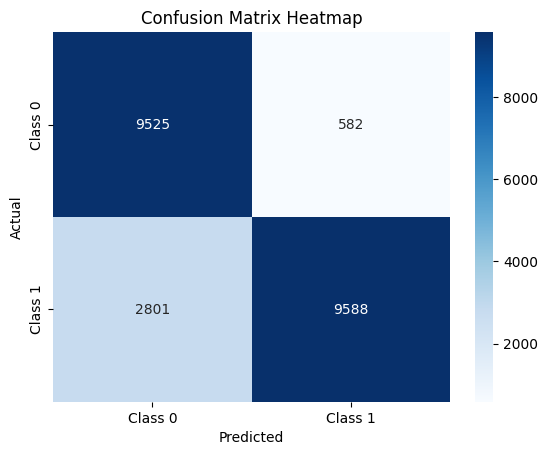

GradientBoosting
Training accuracy:86.16849849416
Test accuracy:85.85526315789474

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.95      0.86     10107
           1       0.95      0.79      0.86     12389

    accuracy                           0.86     22496
   macro avg       0.87      0.87      0.86     22496
weighted avg       0.87      0.86      0.86     22496




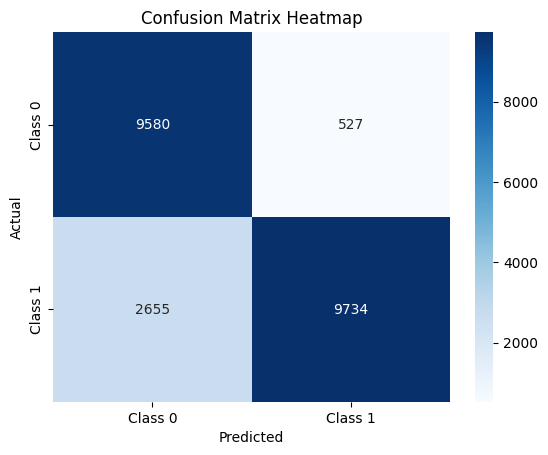

In [ ]:
models = {
    'LogisticRegression': LogisticRegression(),
    'GradientBoosting': GradientBoostingClassifier()


}


for model_name, model in models.items():
  print(f"{model_name}")
  model.fit(X_train_scaled, y_train)
  y_pred = model.predict(X_test_scaled)
  y_prob=model.predict_proba(X_test_scaled)[:, 1]
  # Accuracy
  train_accuracy = model.score(X_train_scaled, y_train) * 100
  test_accuracy = model.score(X_test_scaled, y_test) * 100
  # Evaluate the model
  print(f'Training accuracy:{train_accuracy}')
  print(f'Test accuracy:{test_accuracy}')
  model_evaluation(y_test,y_pred)

Hypertuning Logistic Regression

In [ ]:
params = {
    'penalty':['l1', 'l2'],
    'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]

}
model = LogisticRegression()
# using recall as scoring metrics because we do not wanted to miss  person who are likely to enrolled
grid_search = GridSearchCV(estimator=model, param_grid=params,scoring='recall',cv=5,n_jobs=-1,verbose=1)
grid_search.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='recall', verbose=1)

In [ ]:
grid_search.best_params_

{'C': 100, 'penalty': 'l2'}

Training accuracy:85.2416567573875
Test accuracy:84.96621621621621

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.94      0.85     10107
           1       0.94      0.77      0.85     12389

    accuracy                           0.85     22496
   macro avg       0.86      0.86      0.85     22496
weighted avg       0.87      0.85      0.85     22496




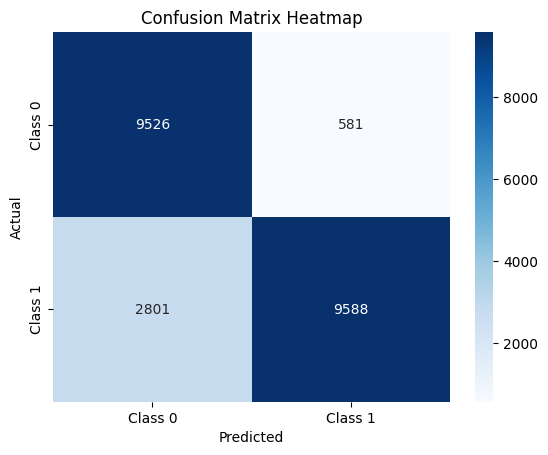

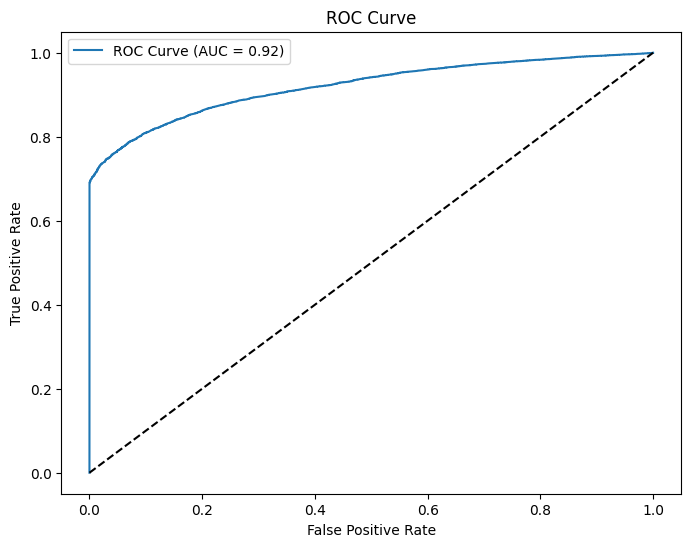

In [ ]:
lm = LogisticRegression(C=10,penalty='l2')
lm.fit(X_train_scaled, y_train)
y_pred = lm.predict(X_test_scaled)
y_prob=lm.predict_proba(X_test_scaled)[:, 1]

# Accuracy
train_accuracy = lm.score(X_train_scaled, y_train) * 100
test_accuracy = lm.score(X_test_scaled, y_test) * 100


# Evaluate the model

print(f'Training accuracy:{train_accuracy}')
print(f'Test accuracy:{test_accuracy}')

model_evaluation(y_test,y_pred)
# Ploting ROC Curve
fpr, tpr, _= roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Using a different threshold to reduce the number of False Negative

Training accuracy:85.23165486814176
Test accuracy:84.96177098150783

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84     10107
           1       0.89      0.82      0.86     12389

    accuracy                           0.85     22496
   macro avg       0.85      0.85      0.85     22496
weighted avg       0.85      0.85      0.85     22496




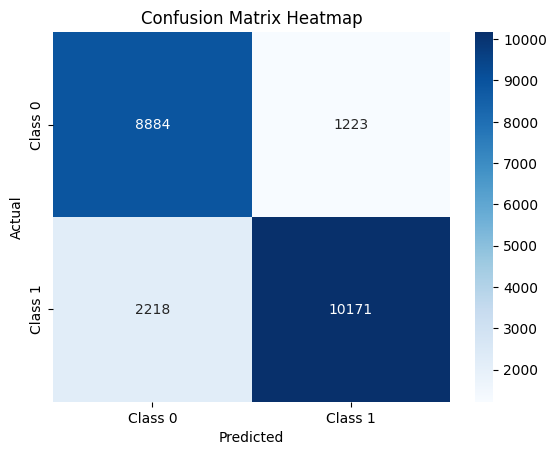

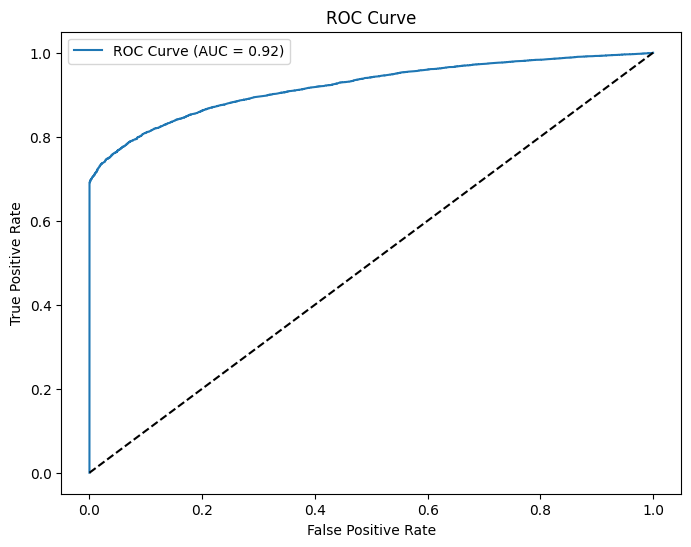

In [ ]:
lm = LogisticRegression()
lm.fit(X_train_scaled, y_train)
lm_y_probs=lm.predict_proba(X_test_scaled)[:, 1]
y_pred=np.where(lm_y_probs > 0.4,1,0)

# Accuracy
train_accuracy = lm.score(X_train_scaled, y_train) * 100
test_accuracy = lm.score(X_test_scaled, y_test) * 100

# Evaluate the model
print(f'Training accuracy:{train_accuracy}')
print(f'Test accuracy:{test_accuracy}')
model_evaluation(y_test,y_pred)
# Ploting ROC Curve
fpr, tpr, _= roc_curve(y_test, lm_y_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Neural Networks


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD, RMSprop
from keras.losses import binary_crossentropy
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# model.summary()

In [ ]:
def neural_model_evalution(hist):
  plt.plot(history.history['loss'],label='Loss on Training Data')
  plt.plot(history.history['val_loss'],label='Loss on Test Data')
  # Set plot labels and title
  plt.xlabel('Number of Epochs')
  plt.ylabel('loss')
  plt.title('Validation loss Comparison')
  plt.legend(loc='best')
  plt.show()


  print("===========================================")

  # Set plot labels and title
  plt.xlabel('Number of Epochs')
  plt.ylabel('Accuracy')
  plt.title('Validation accuracy Comparison')
  plt.plot(history.history['accuracy'],label='Training Accuracy')
  plt.plot(history.history['val_accuracy'],label='Test Accuracy')
  plt.legend(loc='lower right')
  plt.show()


Optimizer: adam


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 15)                  │             375 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 391 (1.53 KB)

 Trainable params: 391 (1.53 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8247 - loss: 0.3667 - val_accuracy: 0.8583 - val_loss: 0.3103
Epoch 2/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8609 - loss: 0.3052 - val_accuracy: 0.8588 - val_loss: 0.3060
Epoch 3/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8620 - loss: 0.3020 - val_accuracy: 0.8603 - val_loss: 0.3049
Epoch 4/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.8632 - loss: 0.2995 - val_accuracy: 0.8607 - val_loss: 0.3043
Epoch 5/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8624 - loss: 0.3006 - val_accuracy: 0.8613 - val_loss: 0.3046
Epoch 6/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8635 - loss: 0.2995 - val_accuracy: 0.8616 - val_loss: 0.3023
Epoch 7/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8638 - loss: 0.2992 - val_accuracy: 0.8618 - val_loss: 0.3034
Epoch 8/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8625 -

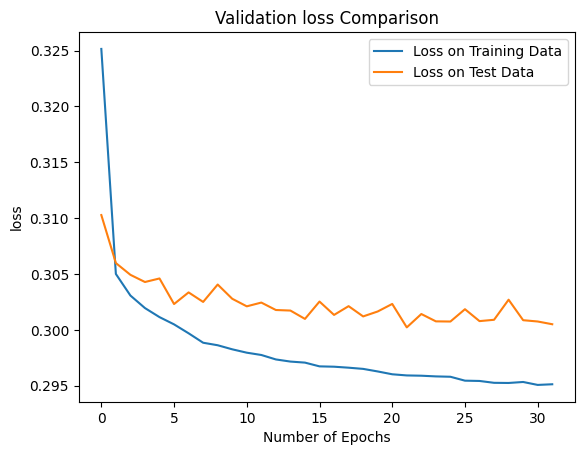

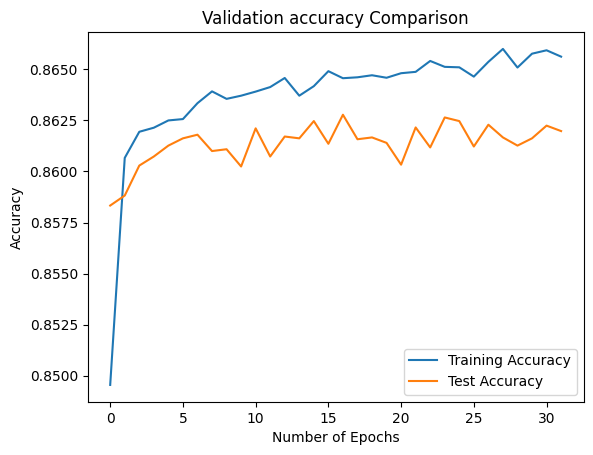

703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8640 - loss: 0.2983
Loss: 0.3005, Accuracy: 0.8620



Optimizer: SGD


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 15)                  │             375 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 391 (1.53 KB)

 Trainable params: 391 (1.53 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.7867 - loss: 0.4292 - val_accuracy: 0.8534 - val_loss: 0.3202
Epoch 2/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.8569 - loss: 0.3146 - val_accuracy: 0.8570 - val_loss: 0.3132
Epoch 3/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8597 - loss: 0.3092 - val_accuracy: 0.8578 - val_loss: 0.3110
Epoch 4/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8599 - loss: 0.3088 - val_accuracy: 0.8570 - val_loss: 0.3105
Epoch 5/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8607 - loss: 0.3066 - val_accuracy: 0.8581 - val_loss: 0.3096
Epoch 6/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.8597 - loss: 0.3068 - val_accuracy: 0.8585 - val_loss: 0.3092
Epoch 7/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.8612 - loss: 0.3043 - val_accuracy: 0.8588 - val_loss: 0.3089
Epoch 8/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.8613 -

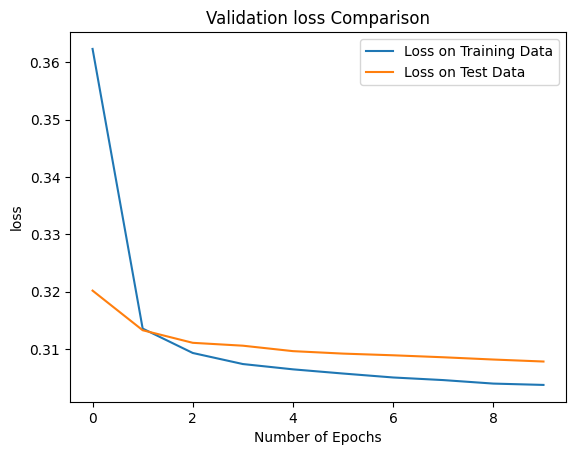

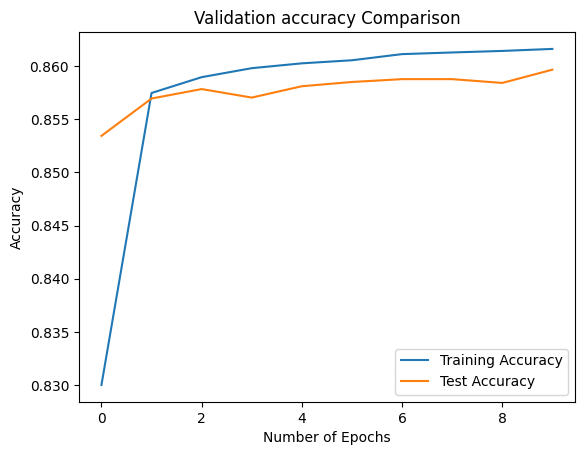

703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8624 - loss: 0.3067
Loss: 0.3078, Accuracy: 0.8597



Optimizer: rmsprop


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 15)                  │             375 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 391 (1.53 KB)

 Trainable params: 391 (1.53 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8092 - loss: 0.3895 - val_accuracy: 0.8563 - val_loss: 0.3133
Epoch 2/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8614 - loss: 0.3083 - val_accuracy: 0.8571 - val_loss: 0.3107
Epoch 3/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.8612 - loss: 0.3088 - val_accuracy: 0.8588 - val_loss: 0.3118
Epoch 4/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8610 - loss: 0.3086 - val_accuracy: 0.8585 - val_loss: 0.3102
Epoch 5/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8596 - loss: 0.3091 - val_accuracy: 0.8589 - val_loss: 0.3097
Epoch 6/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8632 - loss: 0.3076 - val_accuracy: 0.8585 - val_loss: 0.3099
Epoch 7/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8643 - loss: 0.3047 - val_accuracy: 0.8586 - val_loss: 0.3110
Epoch 8/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8639 -

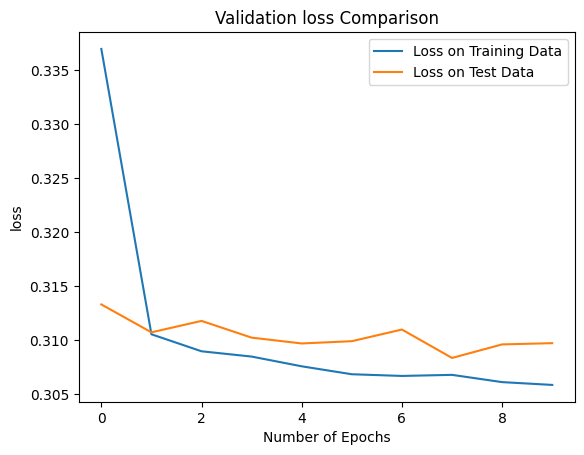

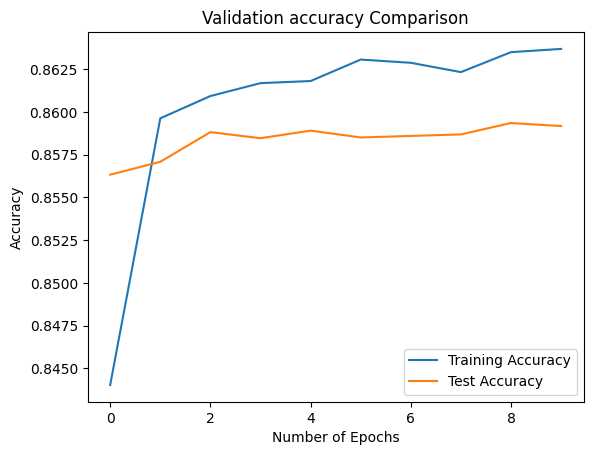

703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8618 - loss: 0.3074
Loss: 0.3097, Accuracy: 0.8592




In [ ]:
# List of optimizers to try
optimizers = [Adam(), SGD(), RMSprop()]

callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

# Loop through each optimizer and create a neural network
for optimizer in optimizers:

    print(f"\nOptimizer: {optimizer.get_config()['name']}")

    # Create Sequential model
    model = Sequential()

    # Add a hidden layer with ReLU activation
    model.add(Dense(units=15, activation='relu', input_shape=(X_train_scaled.shape[1],)))

    # Add output layer with different activations
    if optimizer == RMSprop():
        # RMSprop performs better with softmax in output layer
        model.add(Dense(units=1, activation='softmax'))
    else:
        model.add(Dense(units=1, activation='sigmoid'))

    # Compile the model with binary cross-entropy loss and optimizer

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    model.summary()

    # Fit the model
    history=model.fit(X_train_scaled, y_train, epochs=100, batch_size=15, verbose=1,callbacks=callback,validation_data=(X_test_scaled, y_test))
    neural_model_evalution(history)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test_scaled, y_test)

    print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")
    print("\n")

Neural Network with Two Hidden Layer and 1 output layer


Optimizer: adam


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 15)                  │             375 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 546 (2.13 KB)

 Trainable params: 546 (2.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.8197 - loss: 0.3678 - val_accuracy: 0.8553 - val_loss: 0.3091
Epoch 2/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.8615 - loss: 0.3046 - val_accuracy: 0.8590 - val_loss: 0.3051
Epoch 3/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.8620 - loss: 0.3005 - val_accuracy: 0.8607 - val_loss: 0.3030
Epoch 4/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.8626 - loss: 0.3008 - val_accuracy: 0.8601 - val_loss: 0.3023
Epoch 5/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.8644 - loss: 0.2985 - val_accuracy: 0.8602 - val_loss: 0.3027
Epoch 6/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.8652 - loss: 0.2968 - val_accuracy: 0.8622 - val_loss: 0.3011
Epoch 7/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8664 - loss: 0.2960 - val_accuracy: 0.8603 - val_loss: 0.3019
Epoch 8/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8654 -

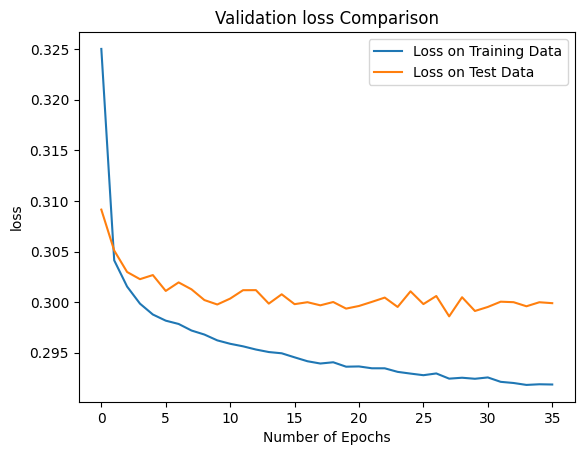

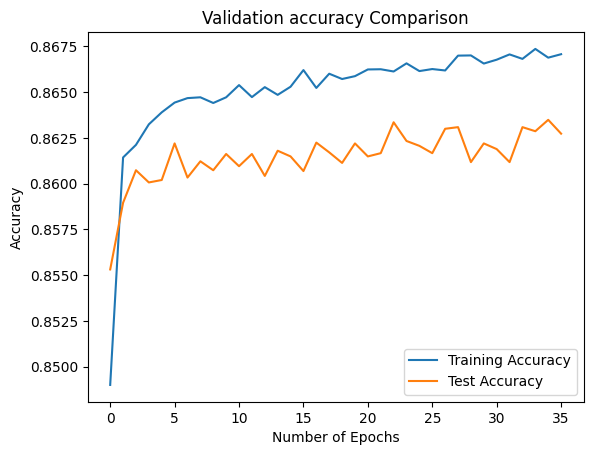

703/703 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8635 - loss: 0.2986
Loss: 0.2999, Accuracy: 0.8627



Optimizer: SGD


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 15)                  │             375 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 546 (2.13 KB)

 Trainable params: 546 (2.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.7725 - loss: 0.4416 - val_accuracy: 0.8534 - val_loss: 0.3177
Epoch 2/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.8573 - loss: 0.3129 - val_accuracy: 0.8574 - val_loss: 0.3117
Epoch 3/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8571 - loss: 0.3102 - val_accuracy: 0.8579 - val_loss: 0.3091
Epoch 4/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.8606 - loss: 0.3051 - val_accuracy: 0.8574 - val_loss: 0.3093
Epoch 5/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8613 - loss: 0.3044 - val_accuracy: 0.8583 - val_loss: 0.3058
Epoch 6/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8611 - loss: 0.3040 - val_accuracy: 0.8589 - val_loss: 0.3060
Epoch 7/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.8616 - loss: 0.3023 - val_accuracy: 0.8587 - val_loss: 0.3063
Epoch 8/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8634 -

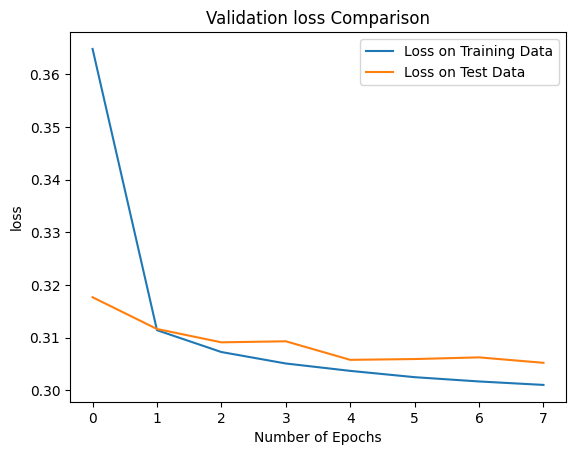

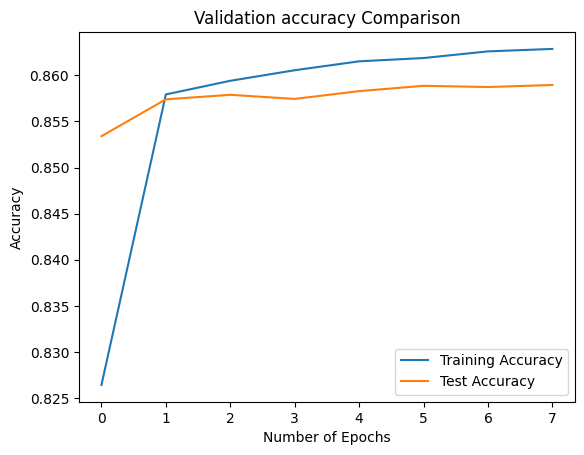

703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8600 - loss: 0.3043
Loss: 0.3052, Accuracy: 0.8590



Optimizer: rmsprop


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 15)                  │             375 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 546 (2.13 KB)

 Trainable params: 546 (2.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8276 - loss: 0.3647 - val_accuracy: 0.8573 - val_loss: 0.3118
Epoch 2/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8621 - loss: 0.3072 - val_accuracy: 0.8599 - val_loss: 0.3088
Epoch 3/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.8650 - loss: 0.3032 - val_accuracy: 0.8596 - val_loss: 0.3055
Epoch 4/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8620 - loss: 0.3064 - val_accuracy: 0.8600 - val_loss: 0.3069
Epoch 5/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8636 - loss: 0.3029 - val_accuracy: 0.8587 - val_loss: 0.3053
Epoch 6/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8638 - loss: 0.3053 - val_accuracy: 0.8603 - val_loss: 0.3062
Epoch 7/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8629 - loss: 0.3056 - val_accuracy: 0.8582 - val_loss: 0.3120
Epoch 8/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8641 -

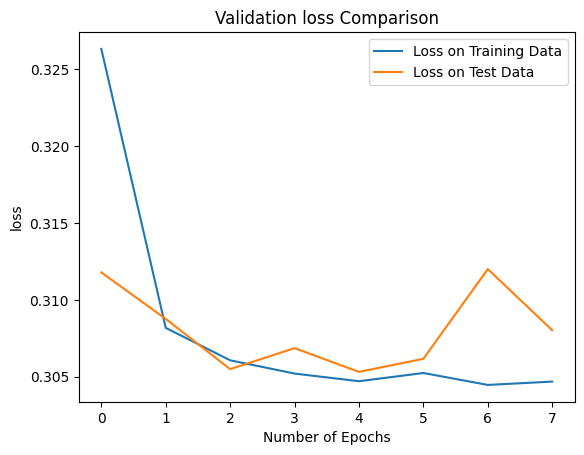

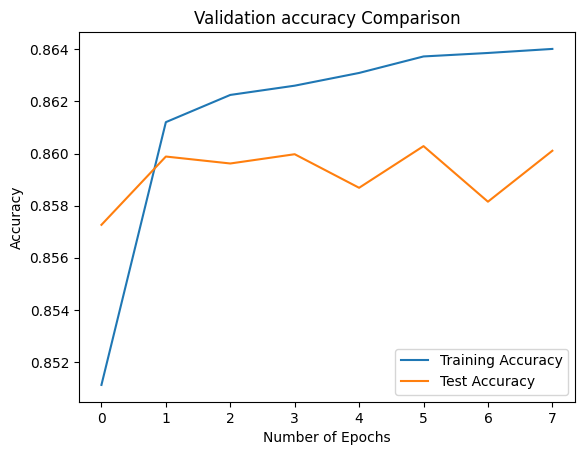

703/703 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8618 - loss: 0.3068
Loss: 0.3080, Accuracy: 0.8601




In [ ]:
# List of optimizers to try
optimizers = [Adam(), SGD(), RMSprop()]

callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=8,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

# Loop through each optimizer and create a neural network
for optimizer in optimizers:

    print(f"\nOptimizer: {optimizer.get_config()['name']}")
    # Create Sequential model
    model = Sequential()

    # Add a hidden layer with ReLU activation
    model.add(Dense(units=15, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(units=10, activation='relu'))

    # Add output layer with different activations
    if optimizer == RMSprop():
        # RMSprop performs better with softmax in output layer
        model.add(Dense(units=1, activation='softmax'))
    else:
        model.add(Dense(units=1, activation='sigmoid'))

    # Compile the model with binary cross-entropy loss and optimizer

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    model.summary()

    # Fit the model
    history=model.fit(X_train_scaled, y_train, epochs=100, batch_size=15, verbose=1,callbacks=callback,validation_data=(X_test_scaled, y_test))
    neural_model_evalution(history)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test_scaled, y_test)

    print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")
    print("\n")

Neural Network with 3 hidden layer and 1 output layer


Optimizer: adam


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 15)                  │             375 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 7)                   │              77 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 620 (2.42 KB)

 Trainable params: 620 (2.42 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.8230 - loss: 0.3682 - val_accuracy: 0.8583 - val_loss: 0.3082
Epoch 2/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8622 - loss: 0.3041 - val_accuracy: 0.8586 - val_loss: 0.3075
Epoch 3/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8612 - loss: 0.3036 - val_accuracy: 0.8599 - val_loss: 0.3048
Epoch 4/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8663 - loss: 0.2969 - val_accuracy: 0.8599 - val_loss: 0.3048
Epoch 5/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8627 - loss: 0.3003 - val_accuracy: 0.8605 - val_loss: 0.3039
Epoch 6/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.8643 - loss: 0.2964 - val_accuracy: 0.8586 - val_loss: 0.3077
Epoch 7/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8645 - loss: 0.2992 - val_accuracy: 0.8603 - val_loss: 0.3027
Epoch 8/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8637 -

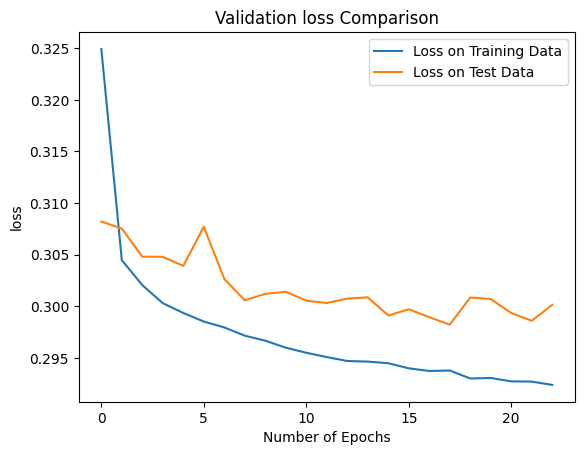

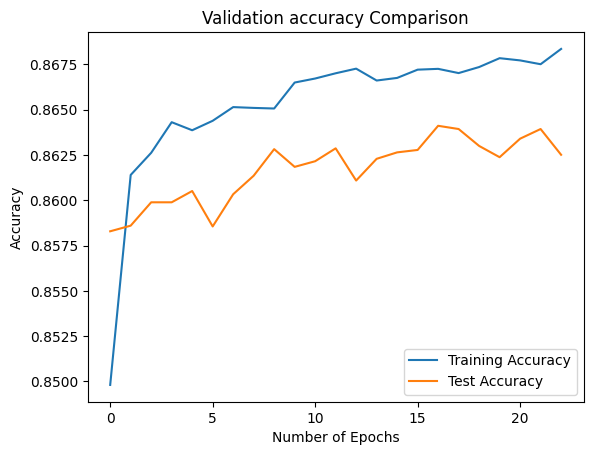

703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8638 - loss: 0.2991
Loss: 0.3001, Accuracy: 0.8625



Optimizer: SGD


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                     │ (None, 15)                  │             375 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 7)                   │              77 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 620 (2.42 KB)

 Trainable params: 620 (2.42 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.7822 - loss: 0.4391 - val_accuracy: 0.8551 - val_loss: 0.3169
Epoch 2/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8595 - loss: 0.3120 - val_accuracy: 0.8574 - val_loss: 0.3105
Epoch 3/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8581 - loss: 0.3097 - val_accuracy: 0.8573 - val_loss: 0.3095
Epoch 4/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.8614 - loss: 0.3037 - val_accuracy: 0.8591 - val_loss: 0.3072
Epoch 5/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8627 - loss: 0.3019 - val_accuracy: 0.8589 - val_loss: 0.3060
Epoch 5: early stopping


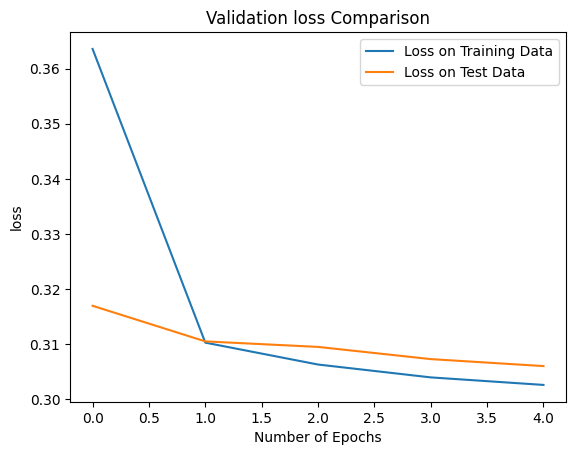

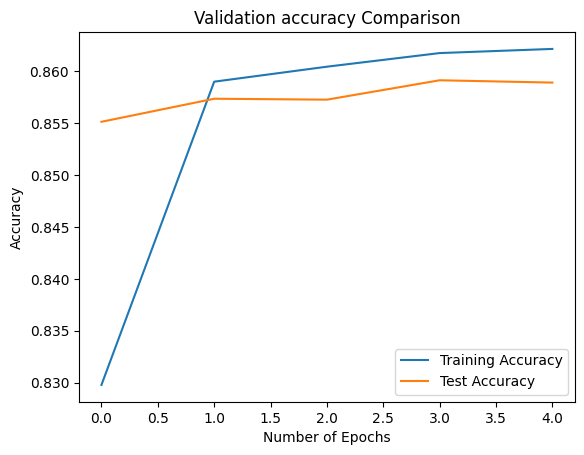

703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8613 - loss: 0.3048
Loss: 0.3060, Accuracy: 0.8589



Optimizer: rmsprop


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                     │ (None, 15)                  │             375 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 10)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 7)                   │              77 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 620 (2.42 KB)

 Trainable params: 620 (2.42 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.8258 - loss: 0.3598 - val_accuracy: 0.8582 - val_loss: 0.3115
Epoch 2/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8605 - loss: 0.3111 - val_accuracy: 0.8589 - val_loss: 0.3119
Epoch 3/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.8619 - loss: 0.3093 - val_accuracy: 0.8600 - val_loss: 0.3092
Epoch 4/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8631 - loss: 0.3062 - val_accuracy: 0.8605 - val_loss: 0.3104
Epoch 5/100
5999/5999 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8630 - loss: 0.3058 - val_accuracy: 0.8605 - val_loss: 0.3095
Epoch 5: early stopping


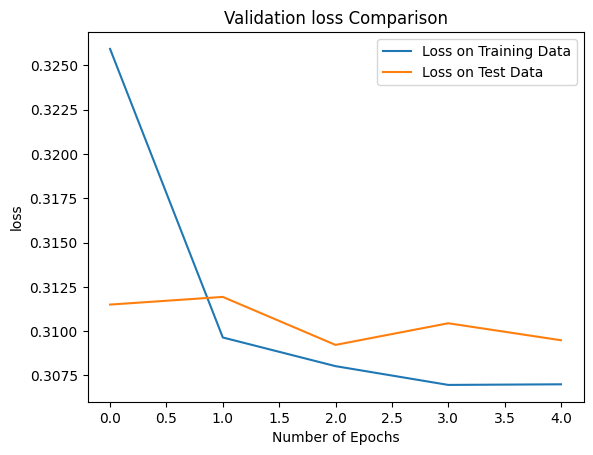

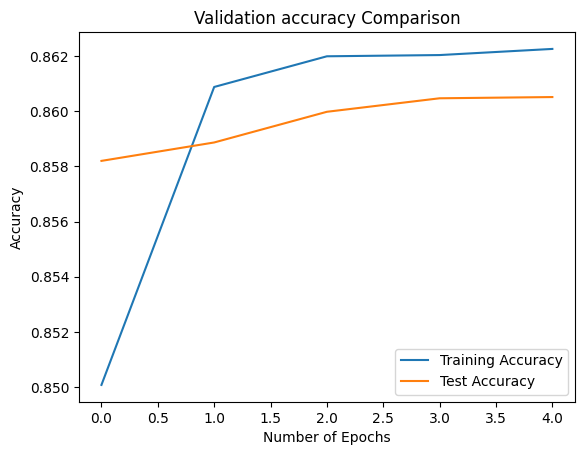

703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8616 - loss: 0.3101
Loss: 0.3095, Accuracy: 0.8605




In [ ]:
# List of optimizers to try
optimizers = [Adam(), SGD(), RMSprop()]

callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

# Loop through each optimizer and create a neural network
for optimizer in optimizers:

    print(f"\nOptimizer: {optimizer.get_config()['name']}")
    # Create Sequential model

    model = Sequential()

    # Add a hidden layer with ReLU activation
    model.add(Dense(units=15, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(units=10, activation='relu'))
    model.add(Dense(units=7, activation='relu'))
    # Add output layer with different activations
    if optimizer == RMSprop():
        # RMSprop performs better with softmax in output layer
        model.add(Dense(units=1, activation='softmax'))
    else:
        model.add(Dense(units=1, activation='sigmoid'))

    # Compile the model with binary cross-entropy loss and optimizer

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    model.summary()

    # Fit the model
    history=model.fit(X_train_scaled, y_train, epochs=100, batch_size=15, verbose=1,callbacks=callback,validation_data=(X_test_scaled, y_test))
    neural_model_evalution(history)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test_scaled, y_test)

    print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")
    print("\n")